<a href="https://colab.research.google.com/github/Bolu141/ENERGY-CONSUMPTION-PREDICTION-AND-OPTIMIZATION-USING-RANDOM-FOREST-REGRESSOR-MODEL-/blob/main/ENERGY_CONSUMPTION_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# we will use the pandas library for data analysis and manipulation.
import pandas as pd

# Often we need some functions from numpy for adding support for large, multi-dimensional arrays and matrices.
import numpy as np

# For data visualization, we import matplotlib
import matplotlib.pyplot as plt

In [4]:
Energy1 = pd.read_excel('/content/drive/MyDrive/PROJECT DATASET/Building energy forecasting/Energy consumption for three years.xlsx')
Energy1

,Time,building 41
0,2016-01-01 01:00:00,23.783228
1,2016-01-01 02:00:00,23.783228
2,2016-01-01 03:00:00,23.783228
3,2016-01-01 04:00:00,23.783228
4,2016-01-01 05:00:00,23.783228
...,...,...
26298,2018-12-31 19:00:00,18.602723
26299,2018-12-31 20:00:00,18.838200
26300,2018-12-31 21:00:00,18.602723
26301,2018-12-31 22:00:00,18.131768


In [5]:
# set time column as index
Energy = Energy1.set_index('Time')
Energy

,building 41
Time,
2016-01-01 01:00:00,23.783228
2016-01-01 02:00:00,23.783228
2016-01-01 03:00:00,23.783228
2016-01-01 04:00:00,23.783228
2016-01-01 05:00:00,23.783228
...,...
2018-12-31 19:00:00,18.602723
2018-12-31 20:00:00,18.838200
2018-12-31 21:00:00,18.602723


In [6]:
# Check the description of the data
Energy.describe()

,building 41
count,26303.000000
mean,25.694969
std,6.317738
min,15.541515
25%,20.957498
50%,23.783228
75%,28.728255
max,59.340330


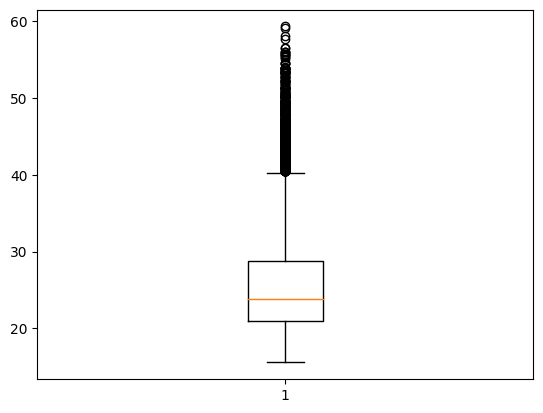

In [7]:
plt.boxplot(Energy['building 41']) # Energy.loc[:,'building 12'] or Energy.iloc[:,0]
plt.show()

<Axes: ylabel='building 41'>

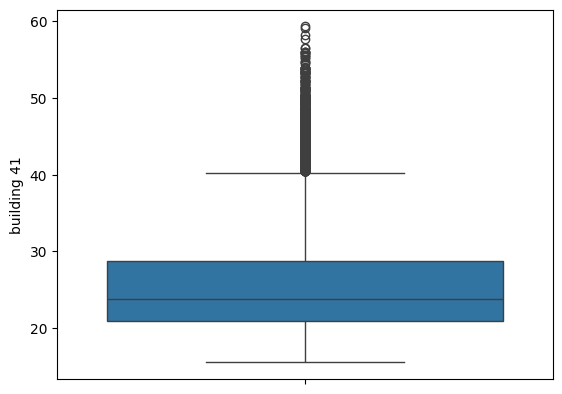

In [8]:
# visual representation of the data description
import seaborn as sns
sns.boxplot(Energy['building 41'])

In [9]:
#Load the Weather data from the excel file
Path= "/content/drive/MyDrive/PROJECT DATASET/Building energy forecasting/WeatherData.xlsx"
knmi= pd.read_excel(Path)
knmi


,Time,month,HH,TD,U,Temp,RH,Q,DR,FF,FX,P
0,2016-01-01 01:00:00,1,1,38,82,6.6,0.82,0,0,30,70,10224
1,2016-01-01 02:00:00,1,2,43,83,7.0,0.83,0,0,40,80,10228
2,2016-01-01 03:00:00,1,3,46,91,5.9,0.91,0,0,30,80,10232
3,2016-01-01 04:00:00,1,4,36,96,4.2,0.96,0,0,20,40,10237
4,2016-01-01 05:00:00,1,5,37,98,4.0,0.98,0,0,20,30,10240
...,...,...,...,...,...,...,...,...,...,...,...,...
26298,2018-12-31 19:00:00,12,19,78,93,8.7,0.93,0,0,30,60,10341
26299,2018-12-31 20:00:00,12,20,74,92,8.5,0.92,0,0,30,50,10338
26300,2018-12-31 21:00:00,12,21,66,89,8.2,0.89,0,0,40,60,10336
26301,2018-12-31 22:00:00,12,22,68,94,7.6,0.94,0,0,40,70,10332


In [10]:
#Set the Time column as index
knmi = knmi.set_index("Time")
knmi

,month,HH,TD,U,Temp,RH,Q,DR,FF,FX,P
Time,,,,,,,,,,,
2016-01-01 01:00:00,1,1,38,82,6.6,0.82,0,0,30,70,10224
2016-01-01 02:00:00,1,2,43,83,7.0,0.83,0,0,40,80,10228
2016-01-01 03:00:00,1,3,46,91,5.9,0.91,0,0,30,80,10232
2016-01-01 04:00:00,1,4,36,96,4.2,0.96,0,0,20,40,10237
2016-01-01 05:00:00,1,5,37,98,4.0,0.98,0,0,20,30,10240
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,12,19,78,93,8.7,0.93,0,0,30,60,10341
2018-12-31 20:00:00,12,20,74,92,8.5,0.92,0,0,30,50,10338
2018-12-31 21:00:00,12,21,66,89,8.2,0.89,0,0,40,60,10336


In [11]:
#concatenating the datasets of weather data and electricity consumption
df = pd.concat([knmi, Energy], axis=1) #axis =1 for considering the columns
df

,month,HH,TD,U,Temp,RH,Q,DR,FF,FX,P,building 41
Time,,,,,,,,,,,,
2016-01-01 01:00:00,1,1,38,82,6.6,0.82,0,0,30,70,10224,23.783228
2016-01-01 02:00:00,1,2,43,83,7.0,0.83,0,0,40,80,10228,23.783228
2016-01-01 03:00:00,1,3,46,91,5.9,0.91,0,0,30,80,10232,23.783228
2016-01-01 04:00:00,1,4,36,96,4.2,0.96,0,0,20,40,10237,23.783228
2016-01-01 05:00:00,1,5,37,98,4.0,0.98,0,0,20,30,10240,23.783228
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,12,19,78,93,8.7,0.93,0,0,30,60,10341,18.602723
2018-12-31 20:00:00,12,20,74,92,8.5,0.92,0,0,30,50,10338,18.838200
2018-12-31 21:00:00,12,21,66,89,8.2,0.89,0,0,40,60,10336,18.602723


In [12]:
# check missing data status
df.isna().sum()

month          0
HH             0
TD             0
U              0
Temp           0
RH             0
Q              0
DR             0
FF             0
FX             0
P              0
building 41    0
dtype: int64

<Axes: >

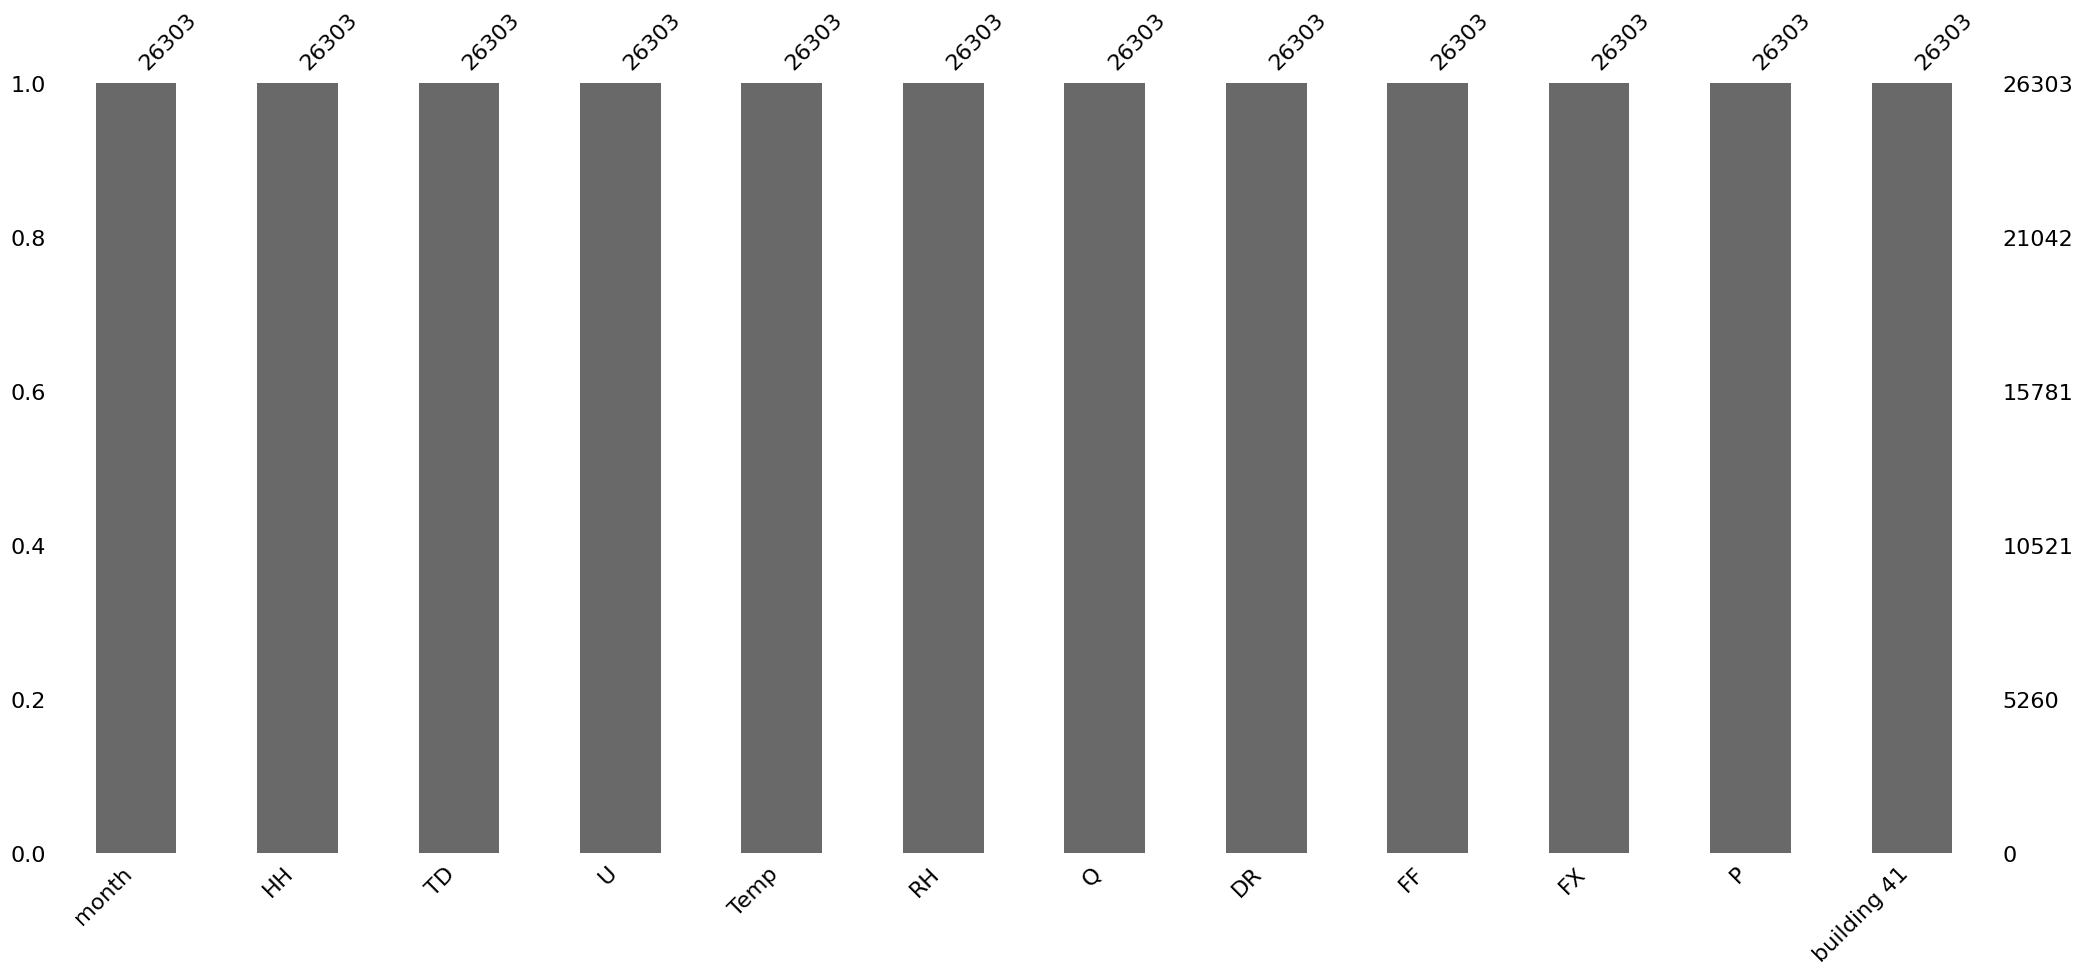

In [13]:
# cross check the availability of the data with missingno library
import missingno as msno
msno.bar(df)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'month'),
  Text(1.5, 0, 'HH'),
  Text(2.5, 0, 'TD'),
  Text(3.5, 0, 'U'),
  Text(4.5, 0, 'Temp'),
  Text(5.5, 0, 'RH'),
  Text(6.5, 0, 'Q'),
  Text(7.5, 0, 'DR'),
  Text(8.5, 0, 'FF'),
  Text(9.5, 0, 'FX'),
  Text(10.5, 0, 'P'),
  Text(11.5, 0, 'building 41')])

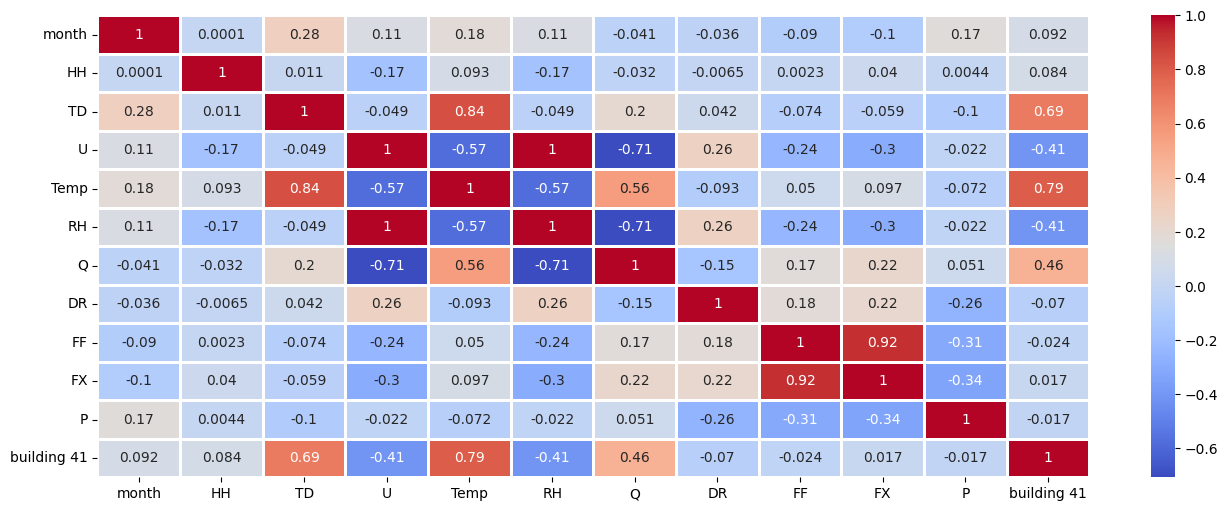

In [14]:
plt.figure(figsize = (16,6)) # Create matplotlib figure
sns.heatmap(df.corr(), annot = True, linewidths=1, fmt=".2g", cmap= 'coolwarm')
# fmt = .1e (scientific notation), .2f (2 decimal places), .3g(3 significant figures), .2%(percentage with 2 decimal places)
plt.xticks(rotation='horizontal')

In [15]:
# Resample the energy of the building over a week using the resmaple function and the mean  function.
df_sum_weekly = df['building 41'].resample('W').mean()

# Resample the temperature over a week.
df_feature1= df["Temp"].resample("W").mean()

# Resample the relative humidity over a week.
df_feature2 = df["U"].resample("W").mean()

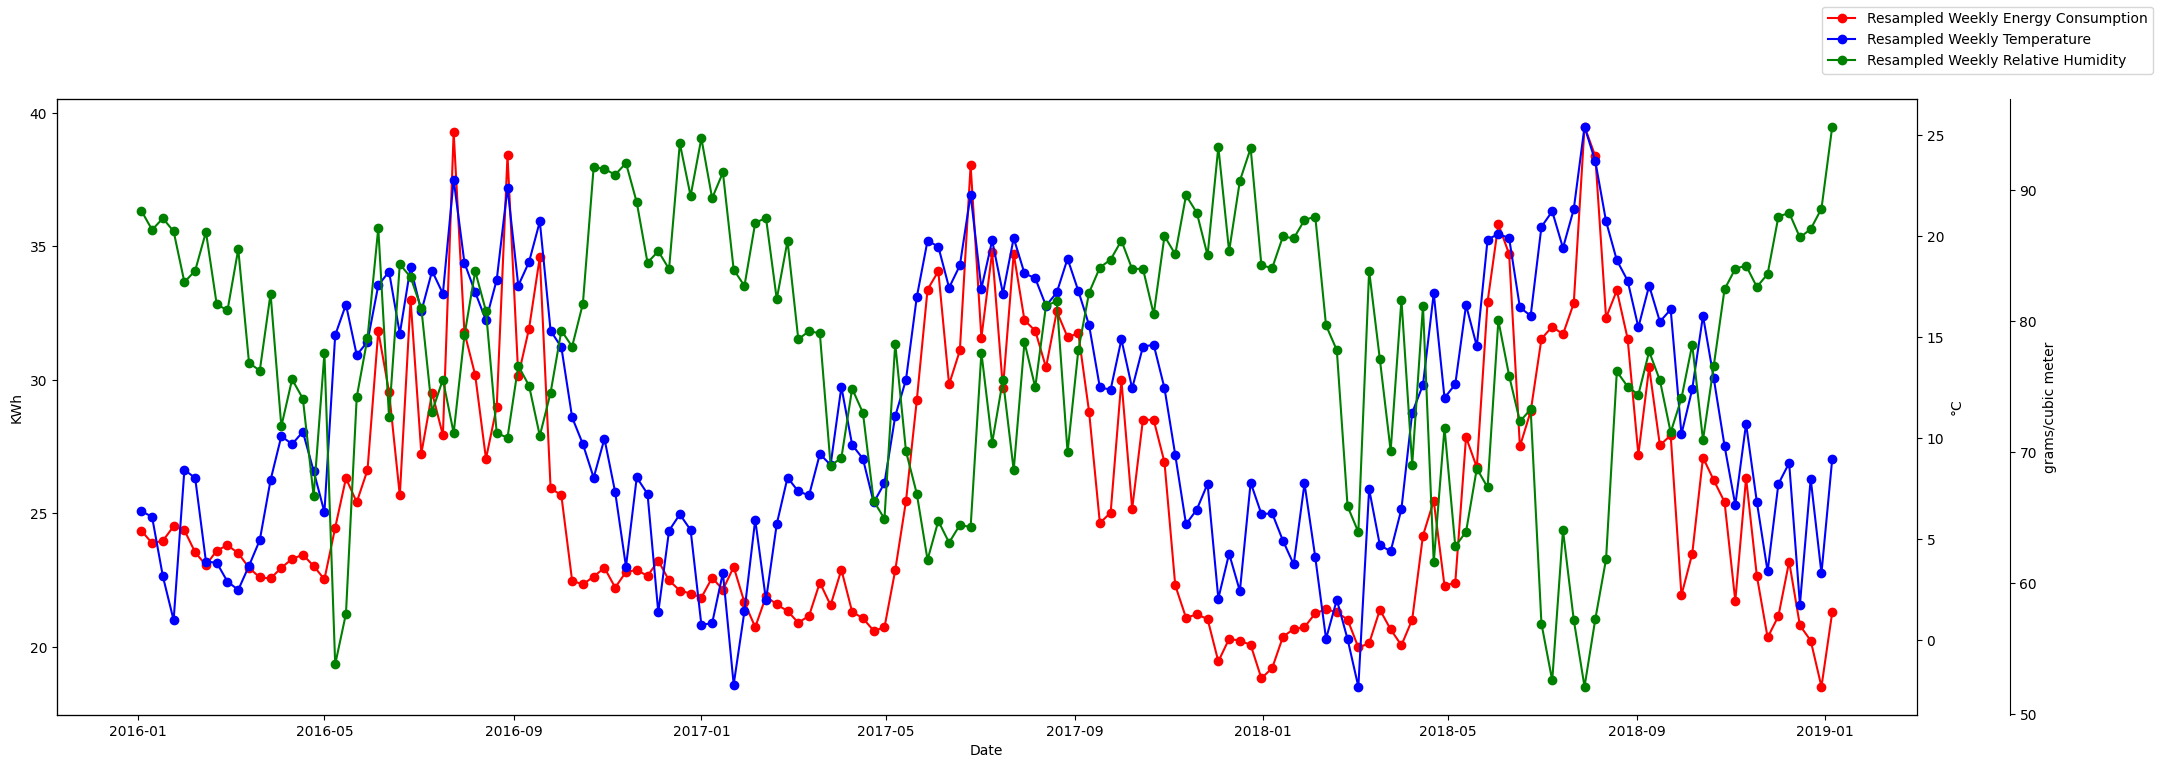

In [16]:
# plot the result
fig,ax = plt.subplots(figsize=(24,8))  # Create matplotlib figure
ax.plot(df_sum_weekly.index, df_sum_weekly, color="red",marker="o")
ax.set_ylabel("KWh")
ax.set_xlabel('Date')
ax2 = ax.twinx() #Create a new Axes with an invisible x-axis and an independent y-axis positioned opposite to the original one (i.e. at right).
ax3 = ax.twinx()
ax2.plot(df_sum_weekly.index, df_feature1, color="blue", marker="o")
ax2.set_ylabel("°C")
ax3.plot(df_sum_weekly.index, df_feature2, color="green", marker="o")
ax3.set_ylabel("grams/cubic meter")
ax3.spines["right"].set_position(("axes", 1.05))
fig.legend(["Resampled Weekly Energy Consumption","Resampled Weekly Temperature","Resampled Weekly Relative Humidity"], loc='upper right')
fig.show()


In [17]:
# calculate the spearmans's correlation between two variables
from scipy.stats import spearmanr

#filter columns from dataframe
energy = np.array(df["building 41"])
hour = np.array(df["HH"])
month= np.array(df["month"])

# calculate spearman's correlation
corr1, _ = spearmanr(energy, hour)
corr2,_ = spearmanr(energy, month)
print('Spearmans correlation between Energy and hour feature: %.3f' % corr1)
print('Spearmans correlation between Energy and month feature: %.3f' % corr2)


Spearmans correlation between Energy and hour feature: 0.068
Spearmans correlation between Energy and month feature: 0.077


In [18]:
#Reduce number of features with lower correlation values or it has an inverse effect on the results of the model.
knmi_updated= knmi.loc[:, ~knmi.columns.isin(["TD","U","DR","FX"])] # ~ sign drops the columns we select
knmi_updated

,month,HH,Temp,RH,Q,FF,P
Time,,,,,,,
2016-01-01 01:00:00,1,1,6.6,0.82,0,30,10224
2016-01-01 02:00:00,1,2,7.0,0.83,0,40,10228
2016-01-01 03:00:00,1,3,5.9,0.91,0,30,10232
2016-01-01 04:00:00,1,4,4.2,0.96,0,20,10237
2016-01-01 05:00:00,1,5,4.0,0.98,0,20,10240
...,...,...,...,...,...,...,...
2018-12-31 19:00:00,12,19,8.7,0.93,0,30,10341
2018-12-31 20:00:00,12,20,8.5,0.92,0,30,10338
2018-12-31 21:00:00,12,21,8.2,0.89,0,40,10336


In [19]:
#Splitting the data into training (80%) and testing (20%) set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(knmi_updated, Energy, test_size = 0.2, random_state = 0)
y_train

,building 41
Time,
2016-11-29 03:00:00,22.370362
2018-01-29 11:00:00,24.725137
2018-07-03 20:00:00,36.028058
2017-09-05 16:00:00,44.034292
2017-03-08 06:00:00,19.309155
...,...
2017-06-30 20:00:00,29.434687
2018-03-29 17:00:00,21.899408
2017-02-14 06:00:00,21.192975


In [20]:
#Splitting the data into training (80%) and testing (20%) set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(knmi_updated, Energy, test_size = 0.2, random_state = 0)
y_train

,building 41
Time,
2016-11-29 03:00:00,22.370362
2018-01-29 11:00:00,24.725137
2018-07-03 20:00:00,36.028058
2017-09-05 16:00:00,44.034292
2017-03-08 06:00:00,19.309155
...,...
2017-06-30 20:00:00,29.434687
2018-03-29 17:00:00,21.899408
2017-02-14 06:00:00,21.192975


In [21]:

y_train = y_train.values.ravel() #ravel is a numpy function to change a 2-dimensional array or a multi-dimensional array into a continuous flattened array.
y_train


array([22.3703625, 24.7251375, 36.0280575, ..., 21.192975 , 19.5446325,
       20.72202  ])

In [22]:
y_test = y_test.values.ravel()
y_test


array([19.5446325, 32.2604175, 20.0155875, ..., 20.72202  , 28.4927775,
       25.1960925])

In [23]:
# importing regression model
from sklearn.svm import SVR

#Creating an instance or object of the support vector machine regressor class
SVReg = SVR(kernel= 'rbf') # It must be one of 'linear', 'poly', 'rbf', 'sigmoid' (rbf - Radial Basis Function is used in machine learning to find a non-linear regression line.)

# fitting the regression model to the training dataset
SVReg.fit(X_train, y_train) #Fit the SVM model according to the given training data.


SVR()

In [24]:
# predicting on the training data
Predicted_Train= SVReg.predict(X_train)
Predicted_Train

array([23.33747534, 23.52037698, 23.57941113, ..., 23.3715236 ,
       23.38476265, 23.42220531])

In [25]:
# To evaluate the performance of the model, importing error metrics function
from sklearn.metrics import r2_score #(coefficient of determination) regression score function.
from sklearn.metrics import mean_squared_error #The MSE indicates the average distance of the best fit regression line to the observed values.

print(r2_score(y_train,Predicted_Train))
print(mean_squared_error(y_train,Predicted_Train))

0.01964854734223298
39.16973198670731


In [26]:
# Import the required packages
from sklearn.preprocessing import StandardScaler #standardizes the data to a range in which the mean is equal to 0 and the standard deviation is 1. It assumes the data is normally distributed.
from sklearn.preprocessing import MinMaxScaler #normalizes the data and brings the values between 0 (lowest value) and 1 (highest value)
from sklearn.preprocessing import RobustScaler #standardizes the data. But is more robust to outliers because it only scales the data according to the Interquartile Range (IQR) between the 1st and 3rd quartile.

#Generate the scaler
sc1= StandardScaler()
sc2= MinMaxScaler()
sc3= RobustScaler()

In [27]:
#Scaling the input data
X1 = sc1.fit_transform(knmi_updated)
X2 = sc2.fit_transform(knmi_updated)
X3 = sc3.fit_transform(knmi_updated)

#We do not need to scale the output data as we have only one output.

<ipython-input-28-1eb50cadd1c5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X1,color="red",label="StdScaler")
<ipython-input-28-1eb50cadd1c5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X2,color="blue",label="MinMax")
<ipython-input-28-1eb50cadd1c5>:4: UserWarning: 

`distplot` is a de

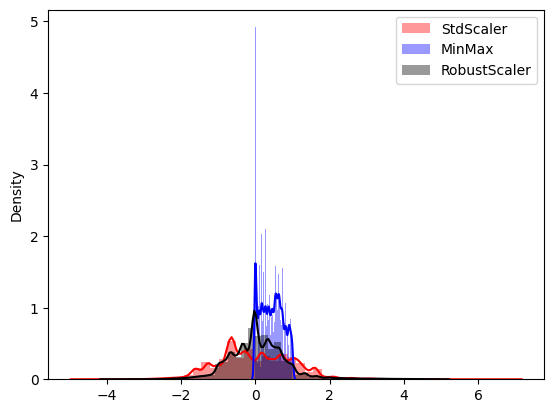

In [28]:
#plotting to visually explore the scaled features
sns.distplot(X1,color="red",label="StdScaler")
sns.distplot(X2,color="blue",label="MinMax")
sns.distplot(X3,color="black",label="RobustScaler")
plt.legend()

In [32]:
#Split your data set into training (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X1, Energy, test_size=0.2, random_state=0, shuffle= False)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [33]:
#building the regressor and fit the training data to the regressor
regr = SVR(kernel='rbf')
regr= regr.fit(X_train, y_train)
regr


SVR()

In [34]:
# fitting the regression model to the training data
regr.fit(X_train, y_train) #Fit the SVM model according to the given training data.
# predicting on the training data
predict_train= regr.predict(X_train)


In [35]:
#testing the model training accuracy
print(r2_score(y_train, predict_train))
print(mean_squared_error(y_train, predict_train))

0.8601131927872456
4.92470626847333


In [36]:
#Predicting on the test data
pred= regr.predict(X_test)
##testing the models accuracy on the test data
print(r2_score(y_test, pred))
print(mean_squared_error(y_test, pred))

0.8517239177814236
7.873057502738416


In [39]:
#Split your data set into training (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X2, Energy, test_size=0.2, random_state=0, shuffle= False)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

#building the regressor and fit the training data to the regressor
regr = SVR(kernel='rbf')
regr= regr.fit(X_train, y_train)

# fitting the regression model to the training data
regr.fit(X_train, y_train) #Fit the SVM model according to the given training data.
# predicting on the training data
predict_train= regr.predict(X_train)

#testing the model training accuracy
print(r2_score(y_train, predict_train))
print(mean_squared_error(y_train, predict_train))

0.8418960691635098
5.566038962319999


In [40]:
#Predicting on the test data
pred= regr.predict(X_test)
##testing the models accuracy on the test data
print(r2_score(y_test, pred))
print(mean_squared_error(y_test, pred))

0.8457647693996563
8.1894721070024


In [42]:

#Split your data set into training (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X3, Energy, test_size=0.2, random_state=0, shuffle= False)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

#building the regressor and fit the training data to the regressor
regr = SVR(kernel='rbf')
regr= regr.fit(X_train, y_train)

# fitting the regression model to the training data
regr.fit(X_train, y_train) #Fit the SVM model according to the given training data.
# predicting on the training data
predict_train= regr.predict(X_train)

#testing the model training accuracy
print(r2_score(y_train, predict_train))
print(mean_squared_error(y_train, predict_train))


0.8526586185734063
5.187144085814172


In [43]:
#Predicting on the test data
pred= regr.predict(X_test)
##testing the models accuracy on the test data
print(r2_score(y_test, pred))
print(mean_squared_error(y_test, pred))

0.8505661203761761
7.934533402368664


Text(0, 0.5, 'kWh')

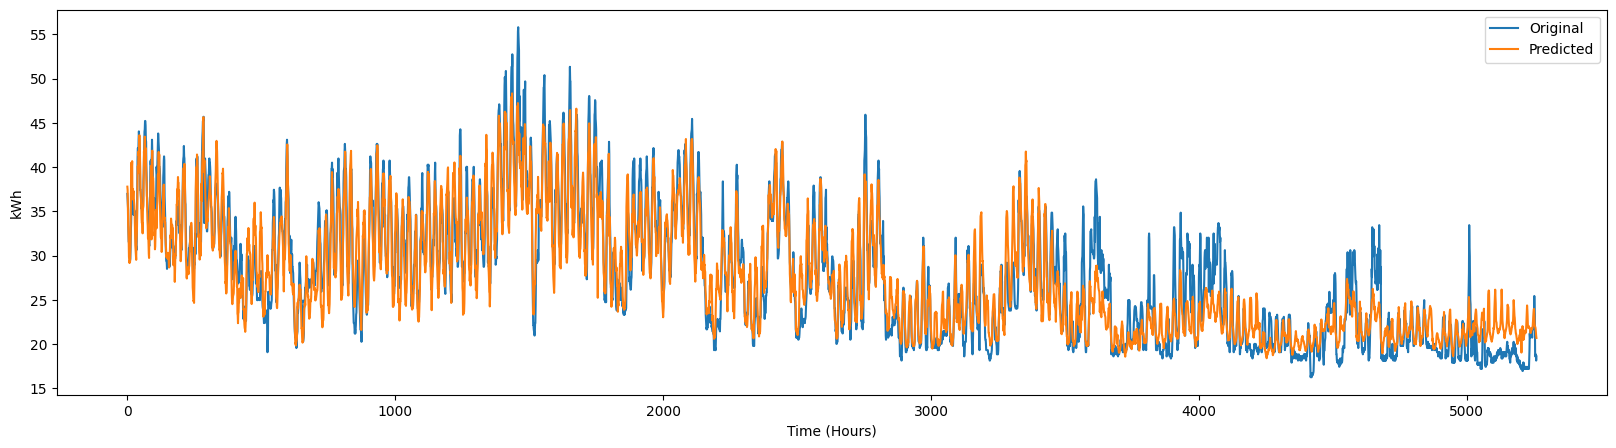

In [44]:
plt.figure(figsize = (20,5))
plt.plot(y_test, label="Original")
plt.plot(pred, label="Predicted")
plt.legend(loc='best')
plt.xlabel('Time (Hours)')
plt.ylabel('kWh')

In [46]:
# We find best_svr result: C=30, epsilon=0.03, gamma=5. Considering these parameters, the model becomes as following:
Regr = SVR(kernel= 'rbf', C=30, epsilon = 0.03, gamma = 5)

# fitting the regression model to the training data
regr.fit(X_train, y_train) #Fit the SVM model according to the given training data.
# predicting on the training data
predict_train= regr.predict(X_train)

#testing the model training accuracy
print(r2_score(y_train, predict_train))
print(mean_squared_error(y_train, predict_train))

0.8526586185734063
5.187144085814172


In [47]:
Regr = SVR(kernel= 'rbf', C=40, epsilon = 0.03, gamma = 5)

# fitting the regression model to the training data
regr.fit(X_train, y_train) #Fit the SVM model according to the given training data.
# predicting on the training data
predict_train= regr.predict(X_train)

#testing the model training accuracy
print(r2_score(y_train, predict_train))
print(mean_squared_error(y_train, predict_train))

0.8526586185734063
5.187144085814172


In [50]:
#importing the ensemble module for the random forest regressor from sklearn library
from sklearn.ensemble import RandomForestRegressor

# Creating an instance of the random forest regressor
RFReg = RandomForestRegressor(max_depth=10, random_state=0)

# fitting the regression model to the training data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X1, Energy, test_size=0.2, random_state=0, shuffle= False)
y_train2 = y_train2.values.ravel()
y_test2 = y_test2.values.ravel()
RFReg.fit(X_train2, y_train2)

#Predicting on the training data
Predicted_Train2= RFReg.predict(X_train2)

#Caculating R2 score and Root mean square error
print(r2_score(y_train2, Predicted_Train2))
print(mean_squared_error(y_train2, Predicted_Train2))

0.9109180231239036
3.1361254050389746


In [52]:
#importing the ensemble module for the random forest regressor from sklearn library
from sklearn.ensemble import RandomForestRegressor

# Creating an instance of the random forest regressor
RFReg = RandomForestRegressor(max_depth=10, random_state=0)

# fitting the regression model to the training data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X1, Energy, test_size=0.2, random_state=0, shuffle= False)
y_train2 = y_train2.values.ravel()
y_test2 = y_test2.values.ravel()
RFReg.fit(X_train2, y_train2)

#Predicting on the training data
Predicted_Train2= RFReg.predict(X_train2)

#Caculating R2 score and Root mean square error
print(r2_score(y_train2, Predicted_Train2))
print(mean_squared_error(y_train2, Predicted_Train2))

0.9109180231239036
3.1361254050389746


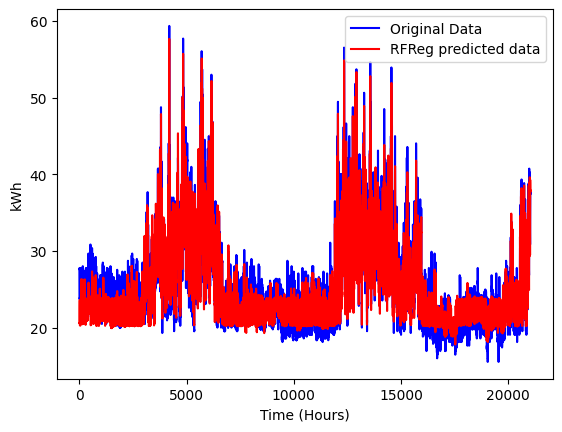

In [53]:
# Lets visualise our fit to the training data.
plt.plot(y_train2, color="b",label= 'Original Data')
plt.plot(Predicted_Train2, color ="red", label="RFReg predicted data")
plt.xlabel('Time (Hours)')
plt.ylabel('kWh')
plt.legend(loc='best')
plt.show()

In [54]:
#Predicting on the test set (X_test)
Predicted_Test2 = RFReg.predict(X_test2)

#Caculating R2 score and Root mean square error
print(r2_score(y_test2,Predicted_Test2))
print(mean_squared_error(y_test2,Predicted_Test2))

0.8256818169278372
9.255822372464069


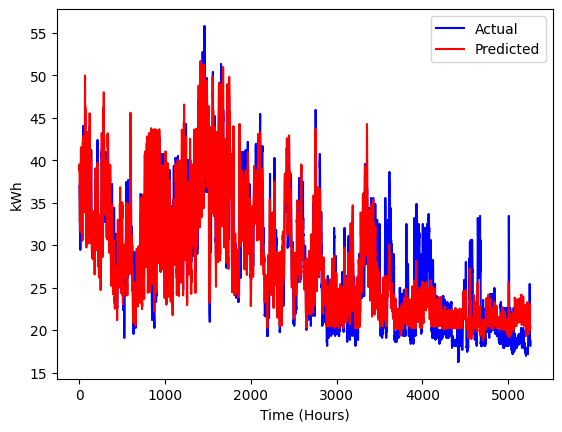

In [55]:
# Lets visualise our fit to the test data.
plt.plot(y_test2, color='blue', label="Actual")
plt.plot(Predicted_Test2, color='Red', label="Predicted")
plt.xlabel('Time (Hours)')
plt.ylabel('kWh')
plt.legend(loc='best')

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
#settings for hyperparameters
check_parameters = {'max_depth':[8,9,11,12]}

gridsearchcv = GridSearchCV(RFReg, check_parameters, n_jobs=-1, cv=3)
gridsearchcv.fit(X_train, y_train)

print('Best parameters found:\n', gridsearchcv.best_params_)

Best parameters found:
 {'max_depth': 8}


In [59]:
#importing the ensemble module for the random forest regressor from sklearn library
from sklearn.ensemble import RandomForestRegressor

# Creating an instance of the random forest regressor
RFReg = RandomForestRegressor(max_depth=12, random_state=0)

# fitting the regression model to the training dat
X_train2, X_test2, y_train2, y_test2 = train_test_split(X1, Energy, test_size=0.2, random_state=0, shuffle= False)
y_train2 = y_train2.values.ravel()
y_test2 = y_test2.values.ravel()
RFReg.fit(X_train2, y_train2)

#Predicting on the training data
Predicted_Train2= RFReg.predict(X_train2)

#Caculating R2 score and Root mean square error
print(r2_score(y_train2, Predicted_Train2))
print(mean_squared_error(y_train2, Predicted_Train2))

0.9388657718506884
2.1522266651443247


In [60]:

#Predicting on the test set (X_test)
Predicted_Test2 = RFReg.predict(X_test2)

#Caculating R2 score and Root mean square error
print(r2_score(y_test2,Predicted_Test2))
print(mean_squared_error(y_test2,Predicted_Test2))

0.8246387533574896
9.31120621688108


In [61]:
#settings for hyperparameters
check_parameters = {'max_depth':[15,20,30]}

gridsearchcv = GridSearchCV(RFReg, check_parameters, n_jobs=-1, cv=10)
gridsearchcv.fit(X_train, y_train)

print('Best parameters found:\n', gridsearchcv.best_params_)

Best parameters found:
 {'max_depth': 15}


In [63]:
#importing the ensemble module for the random forest regressor from sklearn library
from sklearn.ensemble import RandomForestRegressor

# Creating an instance of the random forest regressor
RFReg = RandomForestRegressor(max_depth=30, random_state=0)

# fitting the regression model to the training data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X1, Energy, test_size=0.2, random_state=0, shuffle= False)
y_train2 = y_train2.values.ravel()
y_test2 = y_test2.values.ravel()
RFReg.fit(X_train2, y_train2)

#Predicting on the training data
Predicted_Train2= RFReg.predict(X_train2)

#Caculating R2 score and Root mean square error
print(r2_score(y_train2, Predicted_Train2))
print(mean_squared_error(y_train2, Predicted_Train2))


0.9865317504675531
0.47414887950746465


In [64]:
#Predicting on the test set (X_test)
Predicted_Test2 = RFReg.predict(X_test2)

#Caculating R2 score and Root mean square error
print(r2_score(y_test2,Predicted_Test2))
print(mean_squared_error(y_test2,Predicted_Test2))

0.8223973001412817
9.430221298726103


In [65]:
# Import the weather cost file
path= "/content/drive/MyDrive/PROJECT DATASET/Building energy forecasting/Weather_Cost.xlsx"
weather_cost = pd.read_excel(path)
weather_cost

,Time,month,HH,TD,U,Temp,RH,Q,DR,FF,FX,P
0,2019-01-01 00:00:00,1,1,68,96,73,1,0,6,40,90,10323
1,2019-01-01 01:00:00,1,2,65,94,74,-1,0,0,40,70,10320
2,2019-01-01 02:00:00,1,3,63,93,73,0,0,0,40,70,10314
3,2019-01-01 03:00:00,1,4,61,92,73,0,0,0,50,60,10308
4,2019-01-01 04:00:00,1,5,58,92,69,0,0,0,50,70,10299
...,...,...,...,...,...,...,...,...,...,...,...,...
739,2019-01-31 19:00:00,1,20,-24,93,-15,0,0,0,30,60,9929
740,2019-01-31 20:00:00,1,21,-22,95,-15,0,0,0,30,60,9920
741,2019-01-31 21:00:00,1,22,-24,91,-11,0,0,0,40,70,9911
742,2019-01-31 22:00:00,1,23,-25,87,-6,0,0,0,50,80,9900


In [66]:
# Make time column as index
weather_cost = weather_cost.set_index('Time')

In [67]:
#check missing value
weather_cost.isna().sum()

month    0
HH       0
TD       0
U        0
Temp     0
RH       0
Q        0
DR       0
FF       0
FX       0
P        0
dtype: int64

In [68]:
#remove relative humidity column from the data set
weather_cost_updated= weather_cost.loc[:, ~weather_cost.columns.isin(['U'])]

In [69]:
sc1.fit(weather_cost_updated)

#scale the input data
X5 = sc1.transform(weather_cost_updated)

In [70]:
print(weather_cost.columns)

Index(['month', 'HH', 'TD', 'U', 'Temp', 'RH', 'Q', 'DR', 'FF', 'FX', 'P'], dtype='object')


In [71]:
# Assuming 'Cost' is the column you want to predict
target_variable = weather_cost['HH']

# Assuming 'weather_cost' is the DataFrame *before* removing the 'U' column
weather_cost_for_training = weather_cost.loc[:, ~weather_cost.columns.isin(['U'])]

# Fit the scaler and the RandomForestRegressor model on the training data
sc1.fit(weather_cost_for_training)
RFReg.fit(sc1.transform(weather_cost_for_training), target_variable)
# Now proceed with the prediction as before
X5 = sc1.transform(weather_cost_updated)
predicted = RFReg.predict(X5)
predicted.shape

(744,)

In [72]:
#Converting the predicted array into a dataframe so it is easier when plotting to show the time index
predicted= pd.DataFrame(predicted, columns=['kWh'])
predicted

,kWh
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
...,...
739,20.0
740,21.0
741,22.0
742,23.0


In [73]:
#Import the index from the weather cost file
predicted['Time']= weather_cost.index
predicted

,kWh,Time
0,1.0,2019-01-01 00:00:00
1,2.0,2019-01-01 01:00:00
2,3.0,2019-01-01 02:00:00
3,4.0,2019-01-01 03:00:00
4,5.0,2019-01-01 04:00:00
...,...,...
739,20.0,2019-01-31 19:00:00
740,21.0,2019-01-31 20:00:00
741,22.0,2019-01-31 21:00:00
742,23.0,2019-01-31 22:00:00


In [74]:
#Set the time column as index
predicted= predicted.set_index('Time')
predicted



,kWh
Time,
2019-01-01 00:00:00,1.0
2019-01-01 01:00:00,2.0
2019-01-01 02:00:00,3.0
2019-01-01 03:00:00,4.0
2019-01-01 04:00:00,5.0
...,...
2019-01-31 19:00:00,20.0
2019-01-31 20:00:00,21.0
2019-01-31 21:00:00,22.0


Text(0.5, 0, 'Time')

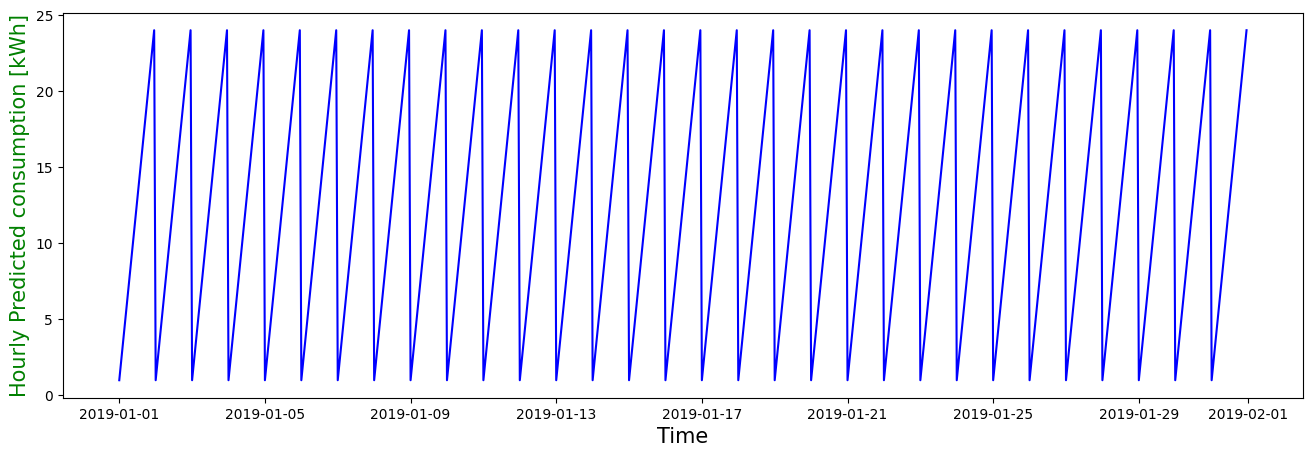

In [75]:
#Plot the hourly forecast consumption in kWh
fig, ax = plt.subplots(figsize = (16,5))
ax.plot(predicted,  label='Hourly Predicted consumption',color = 'blue')
ax.set_ylabel('Hourly Predicted consumption [kWh]',size=15, color='green')
ax.set_xlabel('Time',size=15)

In [76]:
#Calculating the hourly consumtion cost.
Hourly_Cost= predicted*0.23
Hourly_Cost

,kWh
Time,
2019-01-01 00:00:00,0.23
2019-01-01 01:00:00,0.46
2019-01-01 02:00:00,0.69
2019-01-01 03:00:00,0.92
2019-01-01 04:00:00,1.15
...,...
2019-01-31 19:00:00,4.60
2019-01-31 20:00:00,4.83
2019-01-31 21:00:00,5.06


In [77]:
#Resampling the hourly consumption charges into daily by using the resample function and sum
Daily_Cost = Hourly_Cost.resample("D").sum()

print("total cost", Daily_Cost.sum())

total cost kWh    2139.0207
dtype: float64


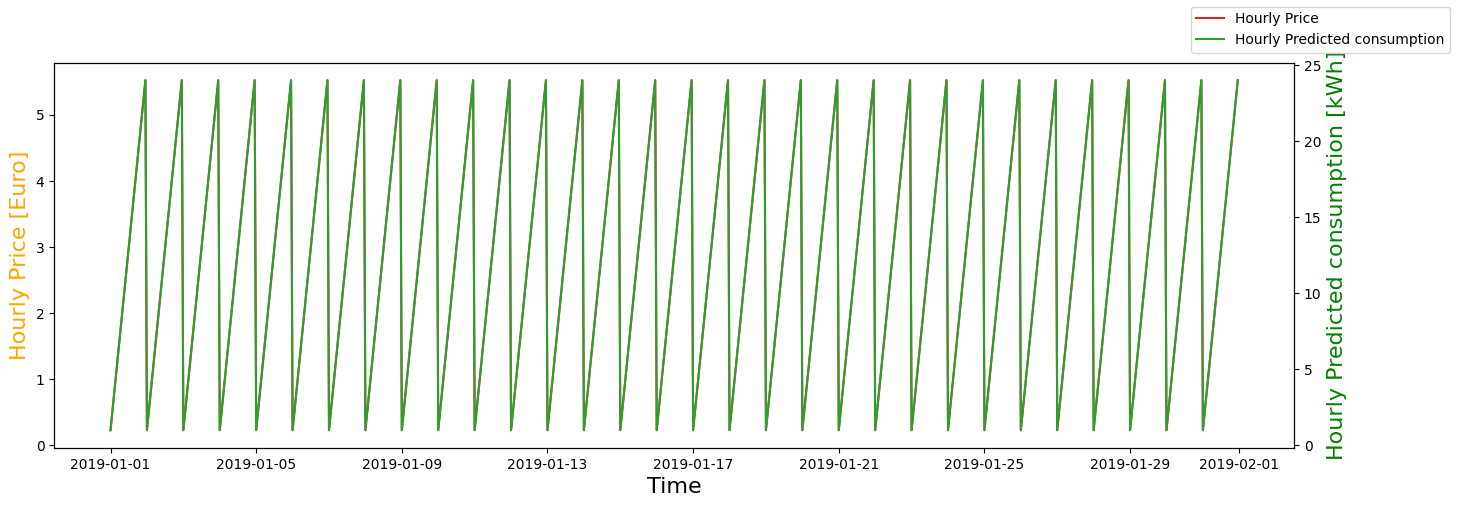

In [78]:
fig, ax = plt.subplots(figsize = (16,5))
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax.plot(Hourly_Cost,  label='Hourly Price',color = 'tab:red')
ax2.plot(predicted,  label='Hourly Predicted consumption',color = 'tab:green')
ax.set_ylabel('Hourly Price [Euro]', size=16, color='orange')
ax2.set_ylabel('Hourly Predicted consumption [kWh]',size=16, color='green')
ax.set_xlabel('Time',size=16,)
fig.legend()

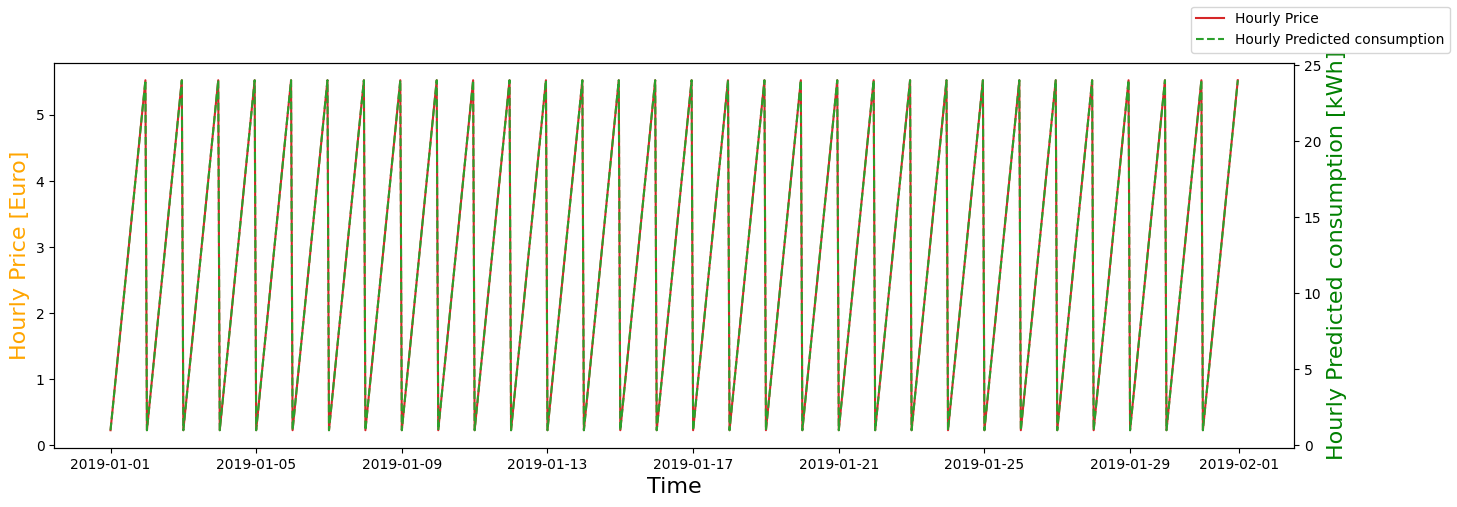

In [79]:
fig, ax = plt.subplots(figsize = (16,5))
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax.plot(Hourly_Cost,  label='Hourly Price',color = 'tab:red')
ax2.plot(predicted,  label='Hourly Predicted consumption',color = 'tab:green', linestyle='dashed')
ax.set_ylabel('Hourly Price [Euro]', size=16, color='orange')
ax2.set_ylabel('Hourly Predicted consumption [kWh]',size=16, color='green')
ax.set_xlabel('Time',size=16)
fig.legend()

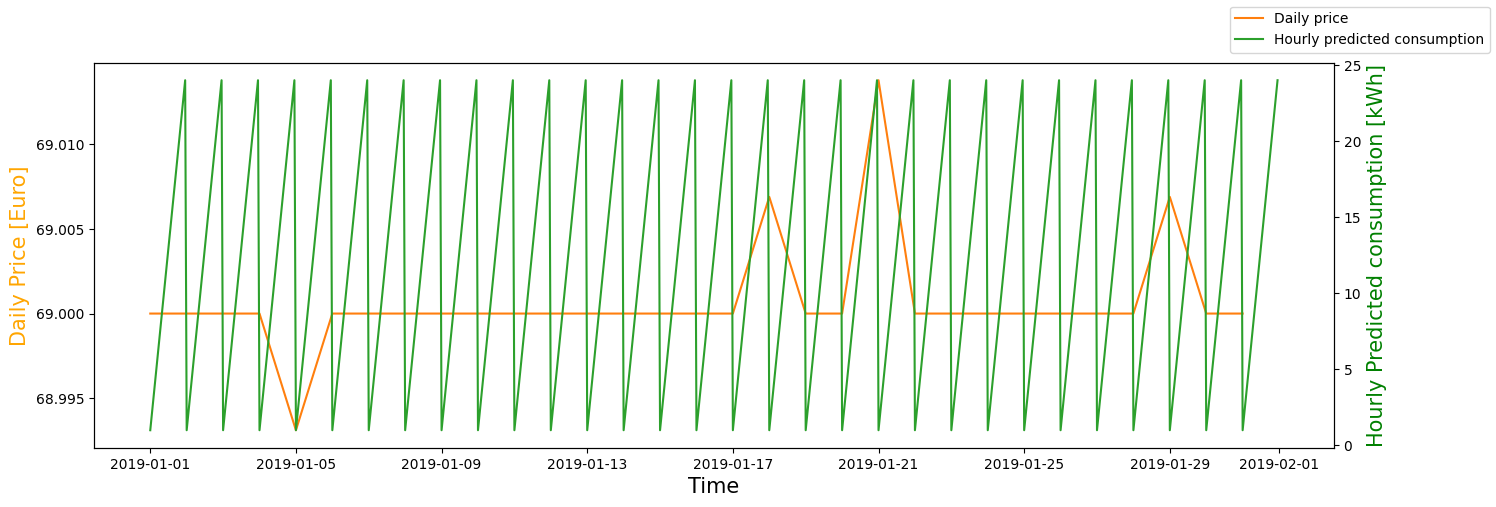

In [80]:
fig, ax = plt.subplots(figsize=(16,5))
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax.plot(Daily_Cost, label= 'Daily price', color = 'tab:orange')
ax2.plot(predicted, label='Hourly predicted consumption', color = 'tab:green')
ax.set_ylabel('Daily Price [Euro]', size=15, color='orange')
ax2.set_ylabel('Hourly Predicted consumption [kWh]',size=15, color='green')
ax.set_xlabel('Time',size=15)
fig.legend()

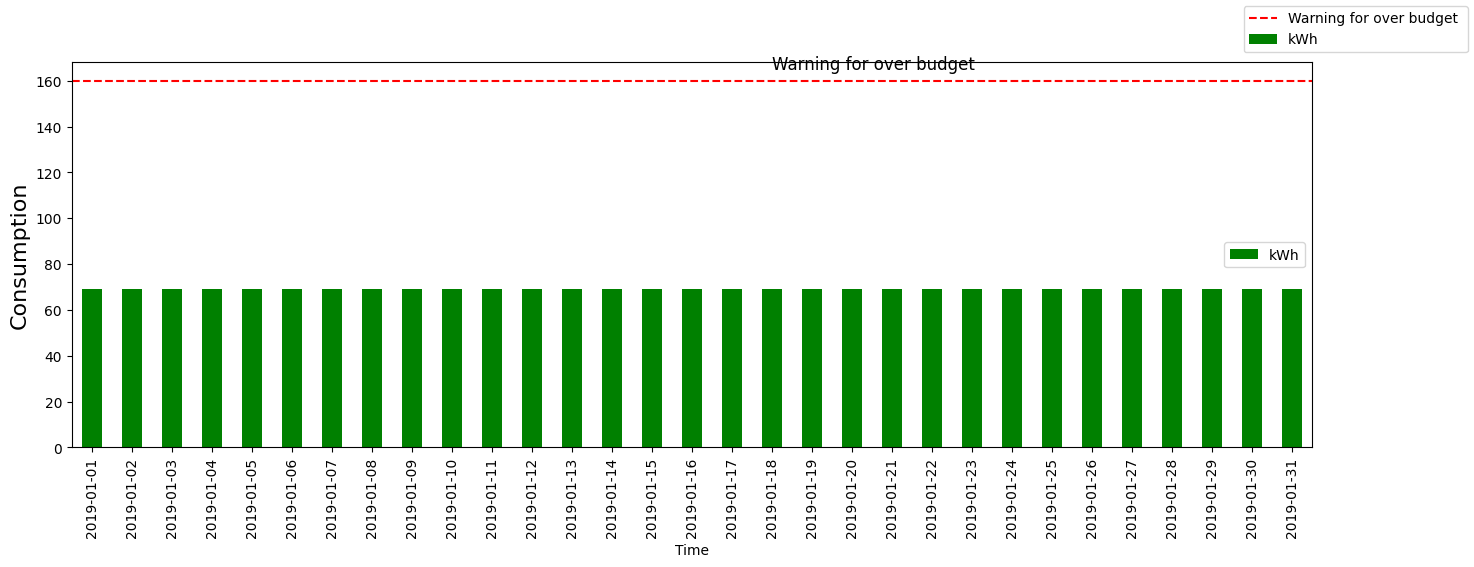

In [81]:
fig = plt.figure(figsize = (16,5)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
Daily_Cost.plot(kind='bar', ax=ax, rot=0,color='green')
ax.axhline(y=160, color='red', linestyle='--', label="Warning for over budget ")
plt.text(17, 165, 'Warning for over budget', fontsize=12)

ax.set_ylabel('Consumption', size=16, color='black')
plt.xticks(rotation='vertical')
ax.set_xticklabels([dt.strftime('%Y-%m-%d') for dt in Daily_Cost.index])
fig.legend()
